In [1]:
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df['age'] = df['age'].fillna(df['age'].mean())

In [6]:
df = df.drop(['deck'],axis=1)

In [7]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.000000,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.000000,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.000000,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.000000,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.000000,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.000000,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,29.699118,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.000000,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [8]:
df.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       2
class          0
who            0
adult_male     0
embark_town    2
alive          0
alone          0
dtype: int64

In [9]:
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

In [10]:
df.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
embark_town      object
alive            object
alone              bool
dtype: object

In [11]:
for col in df:
    if((df[col].dtypes=="category")or(df[col].dtypes=="bool")or(df[col].dtypes=="object")):
        df[col] = labelencoder.fit_transform(df[col])

In [12]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,0,1,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,1,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,2,0,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,2,1,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,2,0,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,0,1,1


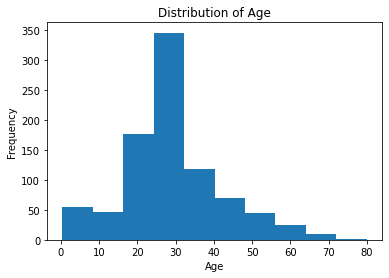

In [13]:
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

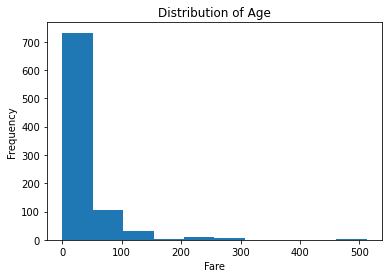

In [14]:
plt.hist(df['fare'], bins=10)
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

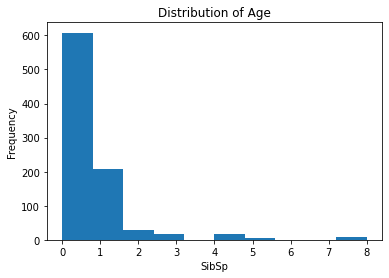

In [15]:
plt.hist(df['sibsp'], bins=10)
plt.xlabel('SibSp')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

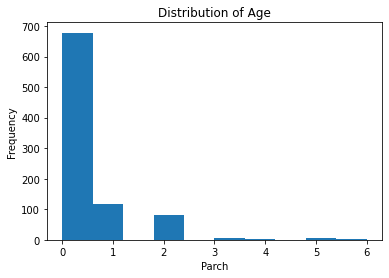

In [16]:
plt.hist(df['parch'], bins=10)
plt.xlabel('Parch')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

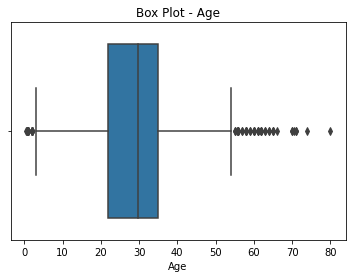

In [17]:
sns.boxplot(x=df['age'])
plt.xlabel('Age')
plt.title('Box Plot - Age')
plt.show()

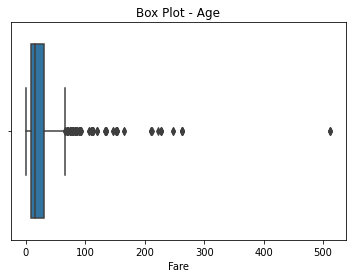

In [18]:
sns.boxplot(x=df['fare'])
plt.xlabel('Fare')
plt.title('Box Plot - Age')
plt.show()

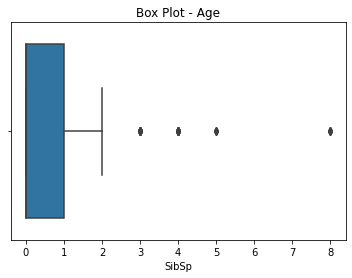

In [19]:
sns.boxplot(x=df['sibsp'])
plt.xlabel('SibSp')
plt.title('Box Plot - Age')
plt.show()

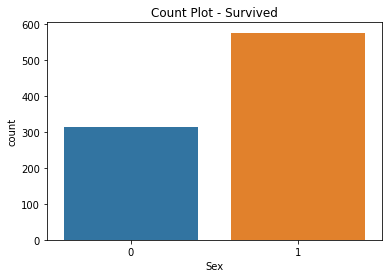

In [20]:
sns.countplot(x=df['sex'])
plt.xlabel('Sex')
plt.title('Count Plot - Survived')
plt.show()

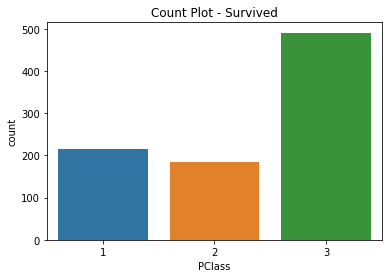

In [21]:
sns.countplot(x=df['pclass'])
plt.xlabel('PClass')
plt.title('Count Plot - Survived')
plt.show()

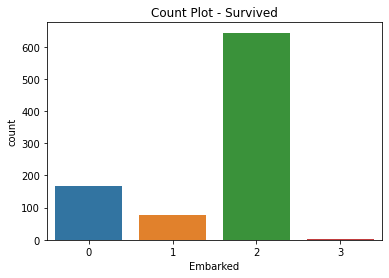

In [22]:
sns.countplot(x=df['embarked'])
plt.xlabel('Embarked')
plt.title('Count Plot - Survived')
plt.show()

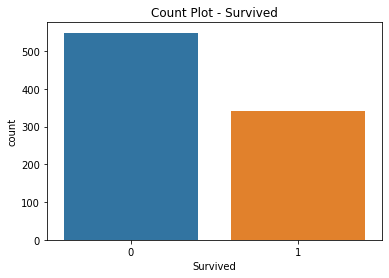

In [23]:
sns.countplot(x=df['survived'])
plt.xlabel('Survived')
plt.title('Count Plot - Survived')
plt.show()